In [17]:
import sys
import os
from dotenv import load_dotenv
import pandas as pd

#1. load environment variables and data

# load environment variables
load_dotenv()

#add working directory to sys path to execute utils/dataset.py
working_dir = os.environ.get("WORKING_DIRECTORY")
sys.path.insert(0, working_dir)

In [18]:
#load data from csv
#/data/processed/wine-z.csv
df = pd.read_csv(os.path.join(working_dir, "data", "processed", "wine-z.csv"))


In [19]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    7206.000000       7206.000000  7206.000000     7206.000000   
mean        6.843172          0.270905     0.327169        6.388329   
std         0.788465          0.085074     0.100968        4.955919   
min         4.400000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.380000        9.800000   
max         9.300000          0.570000     0.690000       20.800000   

         magnesium   flavanoids     minerals      calcium    chlorides  \
count  7206.000000  7206.000000  7206.000000  7206.000000  7206.000000   
mean     49.546253   935.313328   285.973211   236.426958     0.043154   
std      29.049169   267.527407    75.462053    69.979704     0.011791   
min       0.035118   147.340000    61.656005    30.080000     0.012000   
25%      24.537694   748.570000   234.222096   187.715000     0.035000   
50%      49.234554   933.850000   285.252957   236.020000     0.043000   
75%      74.812891  1118.885000   337.936455   284.275000     0.050000   
max      99.998181  1736.640000   516.305244   447.350000     0.112000   

       free sulfur dioxide  total sulfur dioxide      density           pH  \
count          7206.000000           7206.000000  7206.000000  7206.000000   
mean             34.661255            137.526367     0.993959     3.186767   
std              15.486201             41.469606     0.002911     0.141836   
min               2.000000             19.000000     0.987130     2.790000   
25%              23.000000            107.000000     0.991650     3.090000   
50%              33.000000            134.000000     0.993660     3.180000   
75%              45.000000            167.000000     0.996075     3.280000   
max              86.000000            260.000000     1.001960     3.630000   

         sulphates      alcohol      quality  
count  7206.000000  7206.000000  7206.000000  
mean      0.485801    10.536582     5.773800  
std       0.105767     1.221045     1.127863  
min       0.220000     8.400000     1.000000  
25%       0.410000     9.500000     5.000000  
50%       0.470000    10.400000     6.000000  
75%       0.540000    11.400000     6.000000  
max       0.830000    14.000000     9.000000

# 2: Feature Selection

## 2.1 using Correlation

In [20]:
#Correlation Analysis
#use correlation analysis to identify features that are highly correlated with the label (quality) and remove the features that are weakly correlated or not correlated. 
#This is done to reduce the number of features and to avoid multicollinearity.

#caluclate correlation of only the numeric features with label (quality)
corr = df.corr()["quality"].abs().sort_values(ascending=False)
corr



C:\Users\LucaH\AppData\Local\Temp\ipykernel_19252\2254452695.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()["quality"].abs().sort_values(ascending=False)


quality                 1.000000
alcohol                 0.309699
density                 0.215224
chlorides               0.201905
total sulfur dioxide    0.100442
pH                      0.098707
volatile acidity        0.082501
residual sugar          0.075629
fixed acidity           0.070222
magnesium               0.038936
minerals                0.035381
calcium                 0.021990
free sulfur dioxide     0.018744
sulphates               0.009000
citric acid             0.006355
flavanoids              0.006022
Name: quality, dtype: float64

In [21]:
#keep 10 best numeric features in df
df_corr10 = df[corr[:11].index]
df_corr10.head()


quality  alcohol  density  chlorides  total sulfur dioxide    pH  \
0        5      9.2  0.99290      0.048                  98.0  3.19   
1        6     11.1  0.99163      0.039                  68.0  2.96   
2        7     12.6  0.98949      0.035                 123.0  3.24   
3        6      9.1  1.00014      0.045                 253.0  3.02   
4        6     10.0  0.99508      0.041                 150.0  3.23   

   volatile acidity  residual sugar  fixed acidity  magnesium    minerals  
0              0.15             1.1            5.8  76.729301  186.639301  
1              0.25             5.6            6.6   4.795712  251.875712  
2              0.21             1.5            6.7  85.193710  304.703710  
3              0.28            17.5            8.3  11.976525  237.586525  
4              0.42             6.9            7.5   5.599673   95.399673

## 2.1 using Univerate Feature Selection

In [23]:
#Univariate Feature Selection
#use statistical chi-squared test to select the features that are most relevant to the label (quality). use scikit-learn's SelectKBest() function to select the k best features based on the test score.

#split data into features and label
X = df.drop("quality", axis=1)
y = df["quality"]

#for features we only keep the numeric features
X = X.select_dtypes(include=["float64", "int64"])

#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Specs", "Score"]  #naming the dataframe columns
featureScores.nlargest(10, "Score")  #print 10 best features

Specs        Score
10  total sulfur dioxide  3543.645939
9    free sulfur dioxide   928.392572
5             flavanoids   691.470505
6               minerals   649.063015
3         residual sugar   517.914075
4              magnesium   513.717188
7                calcium   423.416174
14               alcohol   211.704213
1       volatile acidity     8.556870
0          fixed acidity     8.086117

In [48]:
#keep 10 best numeric features in df_chi2 - keep the label (quality) as well
df_chi2 = df[featureScores.nlargest(11, "Score")["Specs"].values]
#add label (quality) to df_chi2
df_chi2["quality"] = df["quality"]
#move label (quality) to first column
df_chi2 = df_chi2[["quality"] + list(df_chi2.columns[:-1])]
df_chi2.head()

C:\Users\LucaH\AppData\Local\Temp\ipykernel_19252\3314312148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi2["quality"] = df["quality"]


quality  total sulfur dioxide  free sulfur dioxide  flavanoids    minerals  \
0        5                  98.0                 21.0      894.94  186.639301   
1        6                  68.0                 15.0     1160.95  251.875712   
2        7                 123.0                 45.0      789.82  304.703710   
3        6                 253.0                 48.0      777.86  237.586525   
4        6                 150.0                 62.0      785.72   95.399673   

   residual sugar  magnesium  calcium  alcohol  volatile acidity  \
0             1.1  76.729301   109.91      9.2              0.15   
1             5.6   4.795712   247.08     11.1              0.25   
2             1.5  85.193710   219.51     12.6              0.21   
3            17.5  11.976525   225.61      9.1              0.28   
4             6.9   5.599673    89.80     10.0              0.42   

   fixed acidity  chlorides  
0            5.8      0.048  
1            6.6      0.039  
2            6.7      0.035  
3            8.3      0.045  
4            7.5      0.041

Correlation Analysis
Univariate Feature Selection


array([[<Axes: xlabel='quality', ylabel='quality'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='quality'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='quality'>,
        <Axes: xlabel='flavanoids', ylabel='quality'>,
        <Axes: xlabel='minerals', ylabel='quality'>,
        <Axes: xlabel='residual sugar', ylabel='quality'>,
        <Axes: xlabel='magnesium', ylabel='quality'>,
        <Axes: xlabel='calcium', ylabel='quality'>,
        <Axes: xlabel='alcohol', ylabel='quality'>,
        <Axes: xlabel='volatile acidity', ylabel='quality'>,
        <Axes: xlabel='fixed acidity', ylabel='quality'>,
        <Axes: xlabel='chlorides', ylabel='quality'>],
       [<Axes: xlabel='quality', ylabel='total sulfur dioxide'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='total sulfur dioxide'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>,
        <Axes: xlabel='flavanoids', ylabel='total sulfur dioxide'>,
        <Axes: xlabel='minerals'

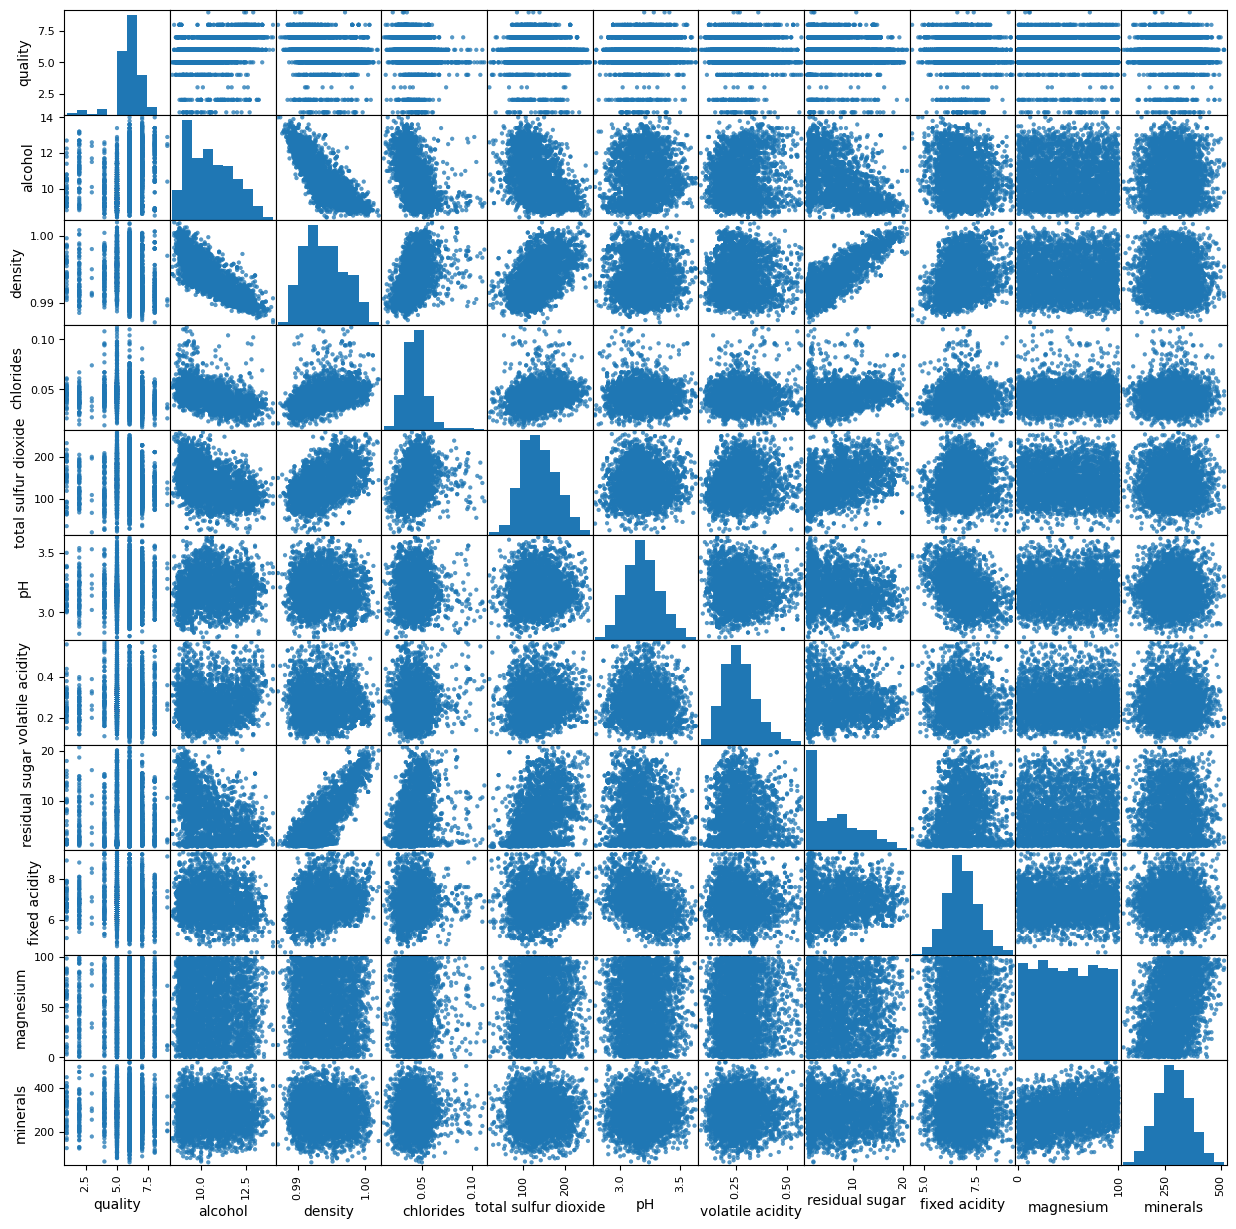

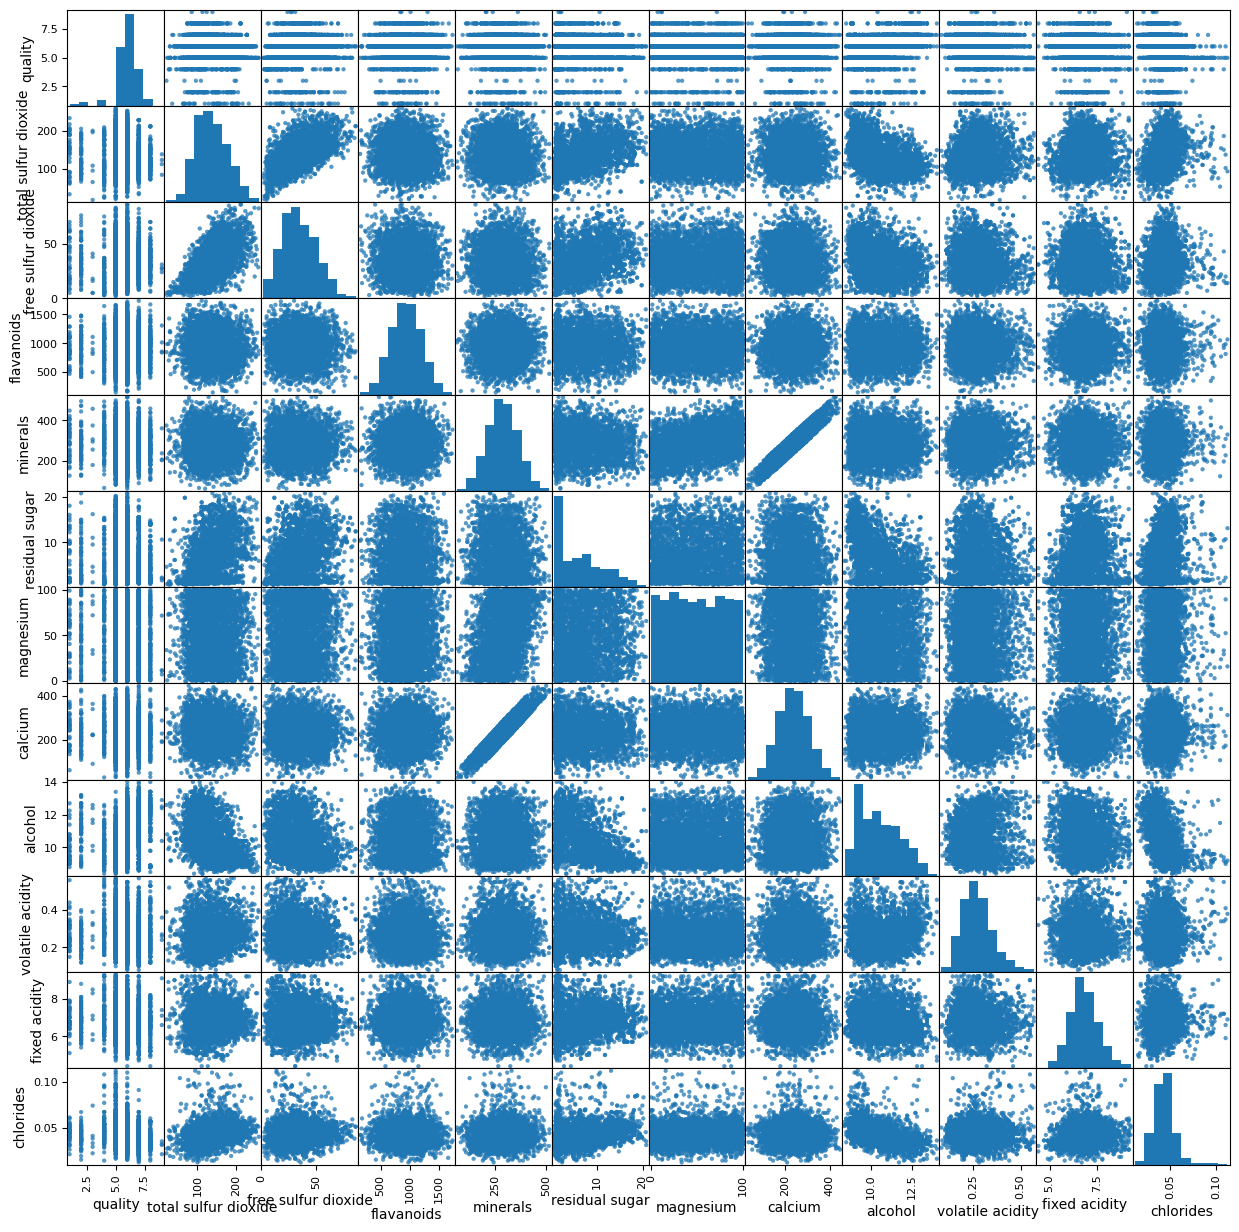

In [49]:
#visualize the dataset using a scatter plot matrix
from pandas.plotting import scatter_matrix

print("Correlation Analysis")
scatter_matrix(df_corr10, figsize=(15, 15))

print("Univariate Feature Selection")
scatter_matrix(df_chi2, figsize=(15, 15))


## Quantile Transformation

Correlation Analysis
Univariate Feature Selection


array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>, <Axes: xlabel='5', ylabel='0'>,
        <Axes: xlabel='6', ylabel='0'>, <Axes: xlabel='7', ylabel='0'>,
        <Axes: xlabel='8', ylabel='0'>, <Axes: xlabel='9', ylabel='0'>,
        <Axes: xlabel='10', ylabel='0'>, <Axes: xlabel='11', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>, <Axes: xlabel='5', ylabel='1'>,
        <Axes: xlabel='6', ylabel='1'>, <Axes: xlabel='7', ylabel='1'>,
        <Axes: xlabel='8', ylabel='1'>, <Axes: xlabel='9', ylabel='1'>,
        <Axes: xlabel='10', ylabel='1'>, <Axes: xlabel='11', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3',

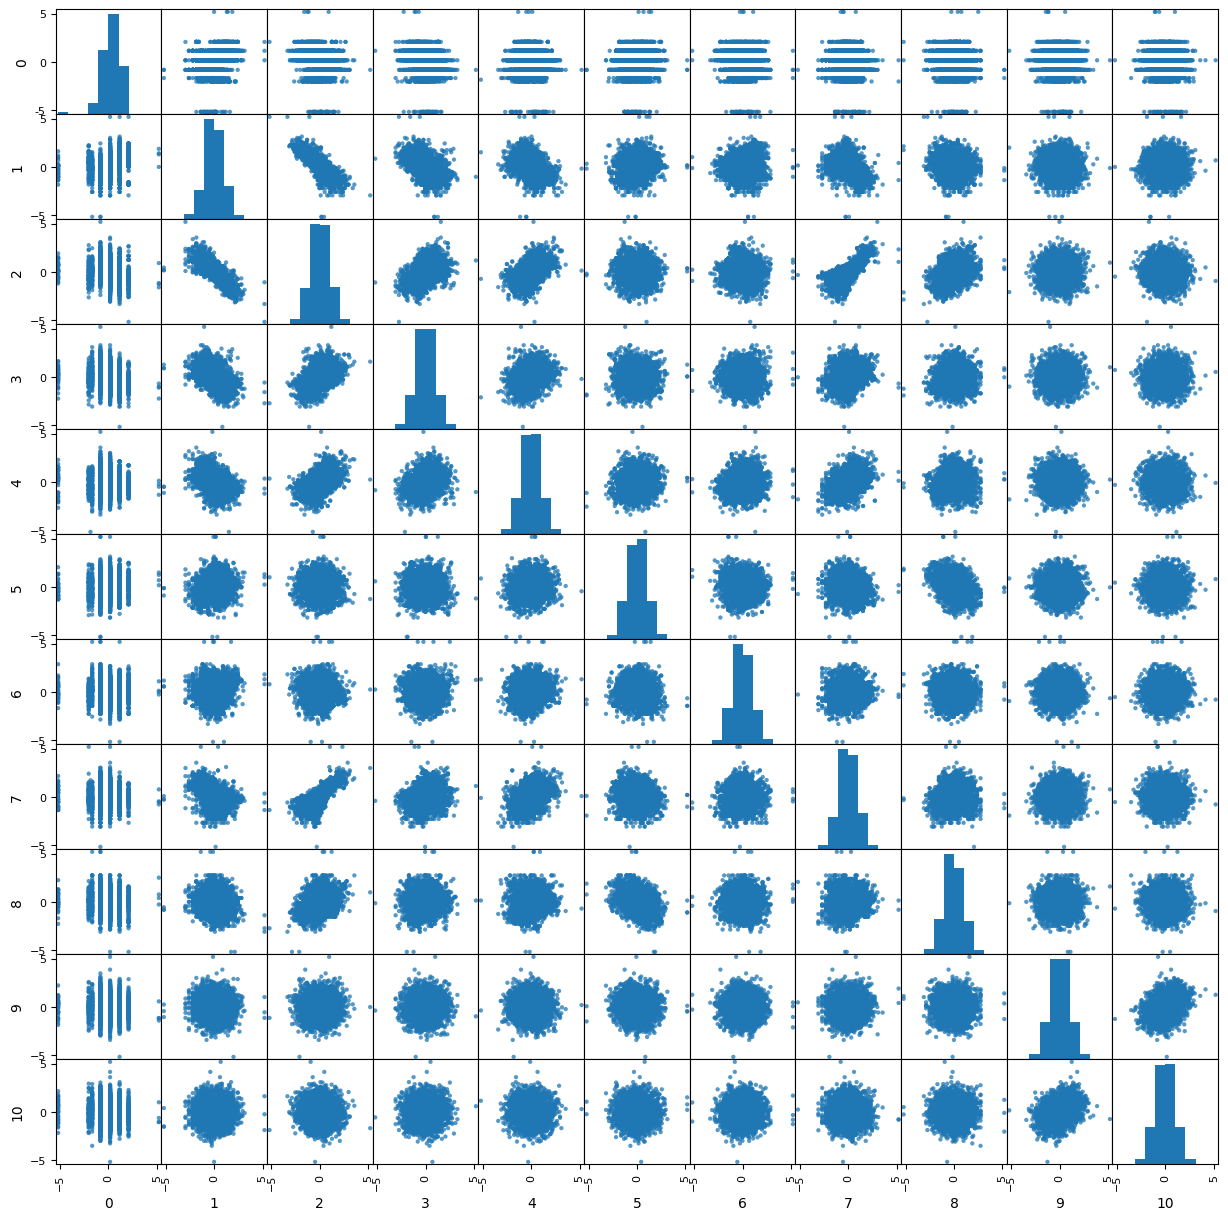

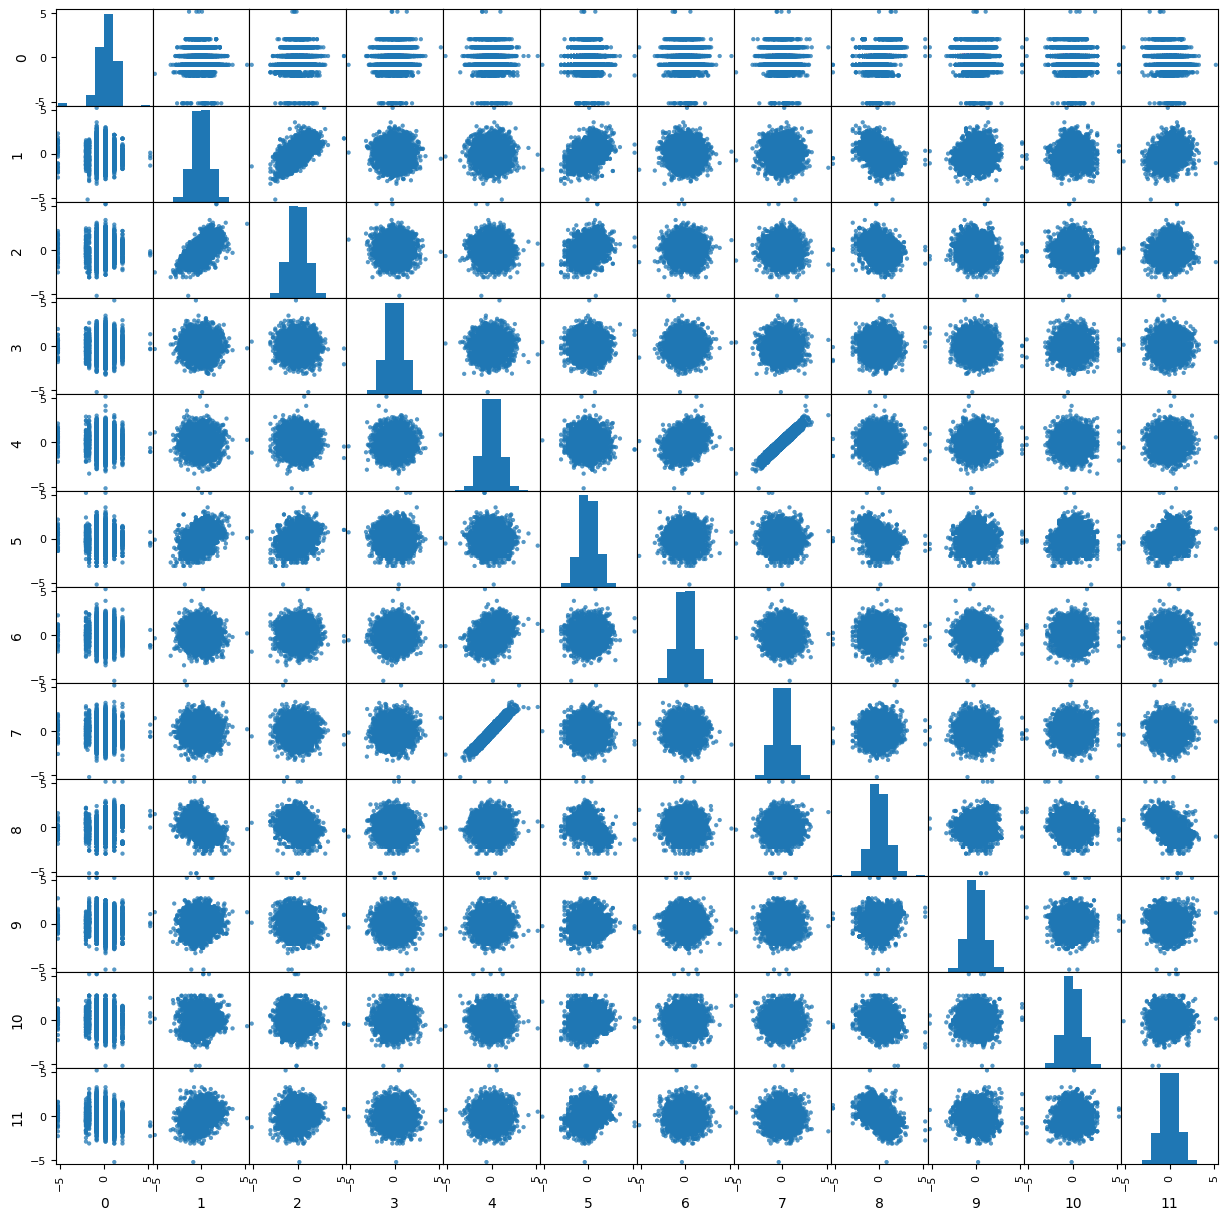

In [50]:
# perform Quantile Transformation to transform the features to follow a normal distribution
from sklearn.preprocessing import QuantileTransformer

#transform the features
transformer = QuantileTransformer(output_distribution="normal")
df_corr10_norm = transformer.fit_transform(df_corr10)
df_chi2_norm = transformer.fit_transform(df_chi2)

#visualize the dataset using a scatter plot matrix
print("Correlation Analysis")
scatter_matrix(pd.DataFrame(df_corr10_norm), figsize=(15, 15))

print("Univariate Feature Selection")
scatter_matrix(pd.DataFrame(df_chi2_norm), figsize=(15, 15))

# 3: Dimensionality Reduction

In [55]:
#dimensionality reduction
#use principal component analysis (PCA) to reduce the number of features. PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.


#split data into features and label

X = df_corr10_norm.drop("quality", axis=1)
y = df_corr10_norm["quality"]

#for features we only keep the numeric features
X = X.select_dtypes(include=["float64", "int64"])

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
fit = pca.fit(X)

#summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)


#visualize the explained variance
import matplotlib.pyplot as plt

plt.plot(fit.explained_variance_ratio_)
plt.xlabel("number of components")
plt.ylabel("explained variance")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [52]:
#reading the graph the elbow is at 8 components
#apply PCA with 8 components
pca = PCA(n_components=8)
fit = pca.fit(X)
data_pca = pca.transform(X)
data_pca = pd.DataFrame(data_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"])

data_pca.head()


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.512097 -1.816232  0.300980 -1.113184  2.155508  0.950015 -1.282700   
1 -1.677460 -0.727063  1.260336  0.436958  0.478503 -0.877164  1.548755   
2 -2.170984  0.161716  0.133424 -0.746465 -0.847411  1.250775 -1.388957   
3  4.292013 -0.728205  0.521001  0.224562 -1.300694 -1.364600  0.550835   
4  1.004159 -3.576231 -0.649146  1.457387 -1.694502 -0.532495 -0.094510   

        PC8  
0 -0.468481  
1 -0.415697  
2 -0.652826  
3  0.228605  
4  0.144492

<Axes: >

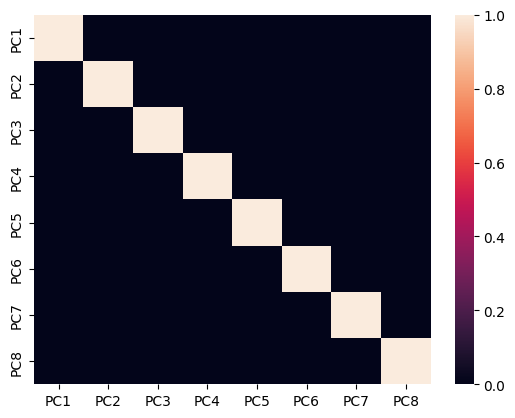

In [53]:
import seaborn as sns
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

In [54]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 0 to 7205
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     7206 non-null   float64
 1   PC2     7206 non-null   float64
 2   PC3     7206 non-null   float64
 3   PC4     7206 non-null   float64
 4   PC5     7206 non-null   float64
 5   PC6     7206 non-null   float64
 6   PC7     7206 non-null   float64
 7   PC8     7206 non-null   float64
dtypes: float64(8)
memory usage: 450.5 KB
